# Plots y visualización de datos

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
coursepath = "../../../../GitHub/python-ml-course/datasets"
mypath = "/Users/carlosdavila/Developer/Anaconda-projects/Curso-ml-python/datasets"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(coursepath, filename)

In [4]:
data = pd.read_csv(fullpath)

In [5]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


El siguiente comando sirve para que los plots queden alineados en el notebook

In [12]:
%matplotlib inline

Esta otra sirve para guardar los plots una vez realizados

In [8]:
#savfig("path_donde_guardadr_imagen.jpeg") # o .png

## Scatter Plot

Para realizar un Scatter plot simple acudiremos a la función del paquete base `plot`, indicando que queremos que el parámetro `kind` sea un "scatter" y determinando las variables de los ejes, como se muestra a continuación

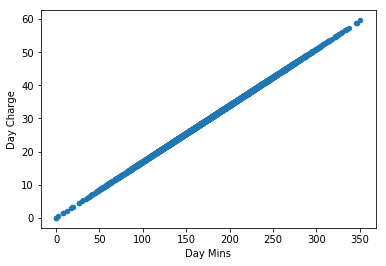

In [13]:
data.plot(kind = "scatter", x = "Day Mins", y = "Day Charge")

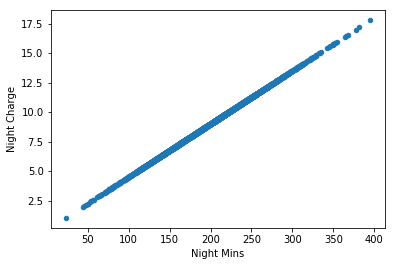

In [14]:
data.plot(kind = "scatter", x = "Night Mins", y = "Night Charge")

Si queremos gráficos más complejos y dinámicos acudiremos a la biblioteca `matplotlib.pyplot`, invocada al principio de este notebook como `plt`

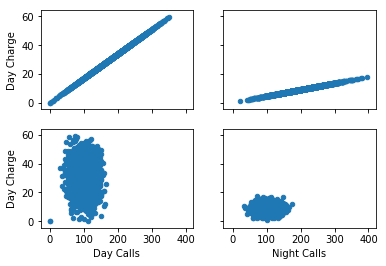

In [16]:
figure, axs = plt.subplots(2,2, sharey = True, sharex = True)
data.plot(kind = "scatter", x = "Day Mins", y = "Day Charge", ax = axs [0][0])
data.plot(kind = "scatter", x = "Night Mins", y = "Night Charge", ax = axs [0][1])
data.plot(kind = "scatter", x = "Day Calls", y = "Day Charge", ax = axs [1][0])
data.plot(kind = "scatter", x = "Night Calls", y = "Night Charge", ax = axs [1][1])

## Histogramas de frecuencias

Sirven para ver como se distribuye una variable numérica

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

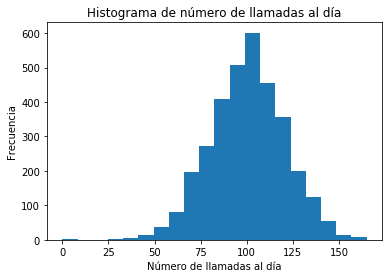

In [21]:
plt.hist(data["Day Calls"], bins = 20)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

También se pueden indicar manualmente las divisiones que queremos de la siguiente forma

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

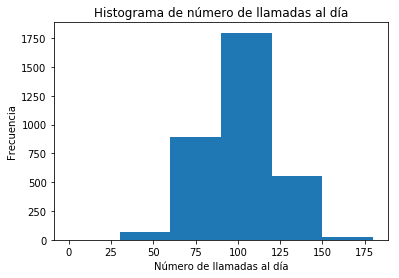

In [22]:
plt.hist(data["Day Calls"], bins = [0,30,60,90,120,150,180])
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

Regla de Sturges para saber cuantas divisiones hay que hacer en un histograma. Necesitamos una función matemática de la biblioteca `numpy`, que hemos invocado al comienzo de este notebook como `np`. Además, necesitaremos redondear el resultado al aplicar la regla de Sturges, para lo que usaremos la función `ceil` y, por último, convertir el resultado a un entero mediante la función `int`

In [31]:
M = len(data.index) # M es el tamaño de la muestra (número de filas)
k = int(np.ceil(1 + np.log2(M)))

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

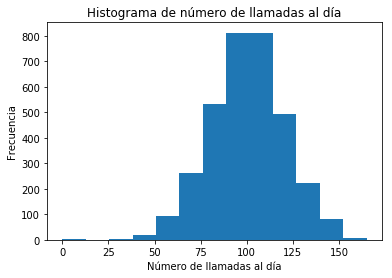

In [30]:
plt.hist(data["Day Calls"], bins = k)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

## Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de número de llamadas al día')

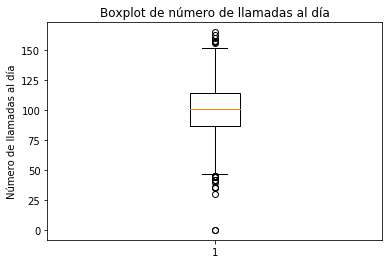

In [36]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas al día")
plt.title("Boxplot de número de llamadas al día")

Interpretación:

- La caja indica dónde están la mayoría de datos: por debajo de la caja queda el 25% de datos más bajos y viceversa
- La raya amarilla es el percentil 50, la mediana
- El bigote se coloca a 1,5 veces el rango intercuartílico como máximo

In [34]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [40]:
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
IQR # Rango intercuartílico

27.0

Sabiendo que 27 es el rango intercuantílico, el bigote de abajo estará situado en:

In [41]:
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

Y el bigote de arriba estará situado en

In [42]:
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

**Todo lo que supera por abajo o por arriba 1,5 veces los cuantiles 1/4 y 3/4 será un** `OUTLIER`